# Vorbereitung  
## NaJ(Tl)-Szintillationszähler  
Ein Szintillationszähler ist ein Instrument zur Detektion und Quantisierung im Sinne der Energiebestimmung von $\gamma$-Strahlung. Somit eignet er sich $\gamma$-Spektren aufzunehmen.  
![alt text](referenzen/szintillationszaehler.jpg "Szintillationszähler")  
Quelle: Eichler, Kronfeldt, Sahm - "Das neue physikalische Grundpraktikum", 2016  

Im Bild gezeigt der schematische Aufbau bestehend aus Szintillator, Photomultiplier (**S**ekundär**e**lektronen**v**ervielfacher) und (Signal)Verstärker. Der Szintillator selbst besteht häufig aus einem mit Thallium dotierten Natriumjodid-Einkristall. Im Szintillator wird die ionisierende Wechselwirkung der einfallenden Gammas ausgenutzt. Über den Fotoeffekt löst ein Gamma-Quant im NaJ-Kristall ein Elektron aus, welches entweder mit höherer Wahrscheinlichkeit im Kristall selbst unter Wärmeentwicklung wieder absorbiert wird oder mit weniger Wahrscheinlichkeit mit einer der Thallium-Fehlstellen unter Aussendung eines Photons höherer Wellenlänge wieder rekombiniert. Die Anzahl der erzeugten Sekundärphotonen ist proportional der Energie der primären Gammas.  

Das Messsignal ist in der Regel eingebettet in einen kontinuierlichen Untergrund. Dieser entsteht durch Streifschüsse der $\gamma$ und hierdurch entstehende Compton-Photonen geringerer Energie.

Typische zeitliche Auflösung: $10^{-7} s$ bis $10^{-10} s$.  
Energieauflösung für $^{137}\text{Cs}$ Gammas liegt bei $\approx 50 keV$

## $\gamma$-Strahlung, $\gamma$-Spektrometrie  
Als $\gamma$-Strahlung wird elektromagnetische Strahlung bezeichnet, die ihren Ursprung im Atomkern hat. Natürlich vorkommende $\gamma$-Strahlung trägt Energien zwischen $10^3$ und $10^6$ eV.  
Schick ist, dass durch die diskrete Natur der Zustände der Nuklide bei Übergängen jeweils charakteristische Gammas ausgesandt werden. Zusammen bilden sie das sogenannte $\gamma$-Linienspektrum welches wiederum zur identifikation einzelner Radionuklide genutzt werden kann. Beispielhaft wäre der Zerfall von $^{60}\text{Co}$ zu $^{60}\text{Ni}$.
$$
\begin{equation}
    ^{60}\text{Co} \longrightarrow ^{60}\text{Ni}^{**} \longrightarrow ^{60}\text{Ni}^{*} + \gamma_{1,17 MeV} \longrightarrow ^{60}\text{Ni} + \gamma_{1,33 MeV}
\end{equation}
$$

## WW von $\gamma$-Strahlung mit Materie, Absorption  
![alt text](referenzen/gamma_in_materie.jpg "Szintillationszähler")  
Quelle: Eichler, Kronfeldt, Sahm - "Das neue physikalische Grundpraktikum", 2016  

Beim Durchgang von $\gamma$-Quanten durch Materie gibt es im Wesentlichen drei Arten der Wechselwirkung die jeweils von der Energie der $\gamma$-Quanten abhängige Häufungswahrscheinlichkeiten besitzen. Diese drei Wechselwirkungsarten sind die Compton-Streuung, Paarbildung und der im Szintillationszähler ausgenutze **Fotoeffekt**. Hieraus folgt, dass es für eine sinnvolle Messung nötig ist die Wahrscheinlichkeit für ein Foto-Event und damit den auf sein Konto gehenden Anteil des Schwächungskoeffizienten zu maximieren.  
Im Bild zu sehen ist, dass für (reines?) $\text{NaJ}$ als Szintillationsmaterial oberhalb einer Energie von $\approx 1 MeV$ de facto keine fotoelektrische Wechselwirkung mehr stattfindet.  
Paarbildung wird erst bei relativ hohen Energien $\geq 10 MeV$ relevant, was bei den hier verwendeten $\gamma$-Strahlern praktisch zu vernachlässigen ist.

## Absorption in Materialien, Halbwertsschichtdicke  
$$
\begin{gather}
    P(d_{1/2}) = \frac{1}{2}P_0 = P_0 \cdot e^{-\mu d} \\
    \Leftrightarrow \\
    d = \frac{ln(2)}{\mu}
\end{gather}
$$
mit der Strahlungsleistung $P$, der Schichtdicke $d$ und dem Schwächungskoeffizienten $\mu$. $\mu$ hängt wiederum von der Quantenenergie ab. Obige Gleichung gilt also nur in annäherungsweise bei kleinen Änderungen der $\gamma$-Energie.

## Radium 226, Folgeprodukte, Zerfallsreihe
$$
\begin{align}
    ^{226}_{80}\text{Ra} &\longrightarrow ^{222}_{86}\text{Rn} + \alpha (+ \gamma_{186 keV}) \\
    ^{222}_{86}\text{Rn} &\longrightarrow ^{218}_{84}\text{Po} + \alpha \\
    ^{218}_{84}\text{Po} &\longrightarrow ^{214}_{82}\text{Pb} + \alpha \\
    ^{214}_{82}\text{Pb} &\longrightarrow ^{214}_{83}\text{Bi} + \beta^- (+\gamma_{352, 295, 242, 53 keV} \\
    ^{214}_{83}\text{Bi} &\longrightarrow ^{214}_{84}\text{Po} + \beta^- (+\gamma_{609 keV} \\
    ...
\end{align}
$$

## Co-60, Cs-137, Zerfall, $\gamma$-Quanten  
$^{137}Cs$ Fotopeak bei $662 \text{keV}$  
$^{60}Co$ Fotopeak bei $1173$ und $1333 \text{keV}$

# Aufbau

# Auswertung  
--> Read The Docs <--  
[https://www.scipy.org/](https://www.scipy.org/)

Zunächst die Importe der Bibliotheken und der Daten:

In [1]:
# Uncomment if following cells don't execute
# !pip3 install ipywidgets ipympl pandas numpy scipy matplotlib --user

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from scipy.optimize import curve_fit

In der nächsten Code-Zelle können die Daten, die nicht geplottet werden sollen, auskommentiert werden.

In [3]:
sample1_path = "./messdaten/csv/Ra226-1.csv"
sample2_path = "./messdaten/csv/Ra226-2.csv"
sample3_path = "./messdaten/csv/Co60.csv"

# Opening the data
with open(sample1_path, newline='', encoding='utf-8') as path:
    sample1 = pd.read_csv(path, delimiter=';')
with open(sample2_path, newline='', encoding='utf-8') as path:
    sample2 = pd.read_csv(path, delimiter=';')
with open(sample3_path, newline='', encoding='utf-8') as path:
    sample3 = pd.read_csv(path, delimiter=';')

Die Dicke der Absorberplatten wurde mit einer handelsüblichen Schieblehre mit einer Abweichung von $\pm 0,05 \text{mm}$ gemessen. In den Gesamtfehler der Dicke des Absorbermaterials geht additiv der Fehler jeder Einzelmessung ein.  

Hier wird eine Klasse ``PlottyStuff()`` definiert, die sich um die Berechnung der kumulierten Absorberdicken, Fehler usw. kümmert. Außerdem werden die Messwerte für die jeweiligen Absorbermaterialien in jeweilige Attribute der Klasse ``PlottyStuff()`` aufrufbar abgelegt.

In [4]:
class PlottyStuff():
    """Class to store and process the aquired data"""

    def __init__(self, sample):
        #  compute the total thickness d of the stack and insert as a new column "d" right after "Stack"

        self.Sample = sample
        if "d" not in self.Sample.columns:
            thicknesses = np.zeros(0)
            position = self.Sample.columns.get_loc("Stack")
            for i, x in enumerate(self.Sample["Stack"]):
                thicknesses = np.append(thicknesses, eval(self.Sample["Stack"][i]))
            self.Sample.insert(position + 1, "d", thicknesses)                       # df.insert(pos, "col name", data)

        # compute the total error of the thicknesses
        if "dErr" not in self.Sample.columns:
            noPlates = np.zeros(0)
            position = self.Sample.columns.get_loc("d")
            for i, x in enumerate(self.Sample["Stack"]):
                noPlates = np.append(noPlates, x.count("+") + 1)
            self.Sample.insert(position + 1, "dErr", noPlates * 0.05)

        # Get the labels, might come in handy for the final plots
        # self.range1 = sample.columns.get_loc("Err") - 1
        # self.range2 = sample.columns.get_loc("Err.1") - 1
        self.erange = [label for label in self.Sample.columns.values if label.endswith("keV")]

        # Relative to absolute Error
        self.Sample["Err"] = self.Sample["Err"].multiply(self.Sample.iloc[:, 4] * 0.01)
        self.Sample["Err.1"] = self.Sample["Err.1"].multiply(self.Sample.iloc[:, 6] * 0.01)

        # Here we define some attributes to store and call the final data
        if "None" in self.Sample.values:
            self.matnone = self.Sample.loc[self.Sample["Material"] == "None"]
        if "Fe" in self.Sample.values:
            self.matfe = self.Sample.loc[self.Sample["Material"] == "Fe"]
        if "Cu" in self.Sample.values:
            self.matcu = self.Sample.loc[self.Sample["Material"] == "Cu"]
        if "Al" in self.Sample.values:
            self.matal = self.Sample.loc[self.Sample["Material"] == "Al"]
        if "Pb" in self.Sample.values:
            self.matpb = self.Sample.loc[self.Sample["Material"] == "Pb"]

    # Getter function to look up types absorband materials
    def get_materials(self):
        """Prints out a list of Materials found in the data set"""
        print(pd.unique(self.Sample["Material"]))

Initialisieren der drei (Isotopen/Messdaten-) Objekte vom Typ ``PlottyStuff`` und anschließendes Löschen der eingelesenen Rohdaten aus dem Speicher.

In [5]:
ra226_1 = PlottyStuff(sample1)
ra226_2 = PlottyStuff(sample2)
co60 = PlottyStuff(sample3)
# print(sample1)
del sample1, sample2, sample3

Wir definieren die Modellfunktion nach $N(d) = N_0 \cdot e^{-\mu \cdot d}$ (wie oben beschrieben) zur Berechnung der Absorptionskoeffizienten $\mu$.

In [6]:
def attenuation(d, Nzero, u, deltad):
    return (Nzero * np.exp(-u * (d - deltad)))

def attenuation_offset(d, Nzero, u, deltad, c):
    return (Nzero * np.exp(-u * (d - deltad)) + c)

Kleiner Test ob denn auch alles funktioniert wie gedacht:

``initial_guesses``: Die beiden Unbekannten $N_0$ und $\mu$ der Modellfunktion müssen nicht unbedingt, können aber vorher abgeschätzt werden. Hier wird für $N_0$ der höchste Wert der Zählrate für ein Material, für $\mu$ wird ein willkürlicher Wert im Bereich einer sinnvollen Größenordnung gewählt.

``bounds``: Für beide Parameter haben negative Werte keine physikalische Entsprechung. Da $N_0$ allerdings bekannt ist, kann die Abschätzung auf den Bereich $\pm$ der in den Daten enthaltenen Abweichung eingegrenzt werden. Der Absorptionskoeffizient wird auf $0 < \mu \leq 2$ begrenzt.

In [7]:
def get_vals(data, erange):
	initial_guesses = [data[erange].iloc[0], 0.2, data["d"].iloc[0]] # initial guesses for Nzero, u and deltad.
	# constraining the optimization of Nzero to the initial guess val for Nzero
	bounds = (
		[data[erange].iloc[0] - data.iloc[0,5], 0, data["d"].iloc[0] - data["dErr"].iloc[0]],
		[data[erange].iloc[0] + data.iloc[0,5], 4, data["d"].iloc[0] + data["dErr"].iloc[0]]
	)
	return curve_fit(attenuation, data["d"], data[erange], p0=initial_guesses, bounds=bounds)

Hier wird abschließend eine Funktion definiert, die nacheinander die übergebenen Messdaten extrahiert und getrennt nach Energiefenstern in einem Plot aufträgt. Zu bemerken ist hier im Grunde nur die Funktion ``getattr()``, die als Argumente einerseits das Objekt nimmt, um das es geht und andererseits das Attribut (des Objektes) von Interesse (siehe ``PlottyStuff()``). Output sind dann die im Attribut enthaltenen Werte.

Primäre Argumente der Funktion sind das Datenset selbst, den Namen des betreffenden Isotops als ``string`` (wird nur für die Diagramtitel verwendet) und drei optionale Schalter:
* ``dark=<True/False>``: Schaltet zwischen hellem und dunklem Design um
* ``verbose=<True/False>``: zeigt horizontale und vertikale Linien an den Stellen der halben Zählrate bzw. der Halbwertschichtdicke an (oder eben nicht).
* ``save2file=<True/False>``: nomen est omen - ob der Plot als lokale *\<isotop\>_\<materialien\>.png* gespeichert werden soll.

In [8]:
def plottyfunct(dataset, isotope, *args, dark=False, save2file=False, verbose=False):
    cm = 1/2.54 # inch to cm, imperial like meh
    plt.style.use("classic") # For some reason needs to be called each time to reliably apply other styles.
    if dark == True:
        # Nightowl mode
        plt.style.use("dark_background")
    else:
        plt.style.use("seaborn-bright")
    # Custom color map readable on either styles
    color_map = {
        "None": "#ff0000",
        "Al": "#c0c0c0",
        "Cu": "#cfac00",
        "Fe": "#7279af",
        "Pb": "#737373"}
    densitys = {
        "Al": 0.0027,
        "Cu": 0.00896,
        "Fe": 0.007874,
        "Pb": 0.01134
        }
    atts = {
        "None": "matnone",
        "Al": "matal",
        "Cu": "matcu",
        "Fe": "matfe",
        "Pb": "matpb"
    }
    bonusticks1, bonusticks2 = [], []
    # Get the attributes of the PlottyStuff() object in order to have something to loop over
    mats = [atts[arg] for arg in args if arg in atts]
    eranges = dataset.erange
    # Define the frame where the plots will live at
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(55*cm, 40*cm))

    # On to business
    for i,mat in enumerate(mats):
        stuff = getattr(dataset, mat)
        
        if mat != "matnone":
            popt, pcov = get_vals(stuff, eranges[0])
            perr = np.sqrt(np.diag(pcov))
            generic_d = np.linspace(0, stuff["d"].iloc[-1], 100)

            label=(
                "{0}: $N_i$ = ({1} $\pm$ {2}) $min^{{-1}}$, $\mu$ = ({3} $\pm$ {4}) $mm^{{-1}}$, $\\frac{{\mu}}{{\\rho}}$ = ({5} $\pm$ {6}), $d_{{1/2}}$ = ({7} $\pm$ {8})".format(
                    args[i], round(popt[0]), round(perr[0]),
                    round(popt[1], 4), str(round(perr[1], 4)),
                    round(popt[1] / densitys[args[i]], 4), round(perr[1] / densitys[args[i]], 4),
                    round(np.log(2) / popt[1], 2), round(0.5 * perr[1] * np.log(2) / popt[1]**2, 2)
                    ))
            ax1.plot(generic_d, attenuation(generic_d, *popt), color=color_map[args[i]], label=label)
            if eranges[0] == "72 keV":
                if args[i] == "Fe":
                    ax1.plot(generic_d, attenuation_offset(generic_d, 9360, 0.337, 1.4, 7180), linestyle="--", color=color_map["Fe"], label="Fe: Manueller Fit")
                elif args[i] == "Cu":
                    ax1.plot(generic_d, attenuation_offset(generic_d, 8300, 0.364, 1.15, 6970), linestyle="--", color=color_map["Cu"], label="Cu: Manueller Fit")
            if verbose == True:
                print("{0} {1}: N0 {2}, N_incident {3}, u {4}, Delta d {5}".format(eranges[0], args[i], round(attenuation(0, *popt)), round(popt[0]), popt[1], popt[2]))
                ax1.axhline(attenuation(round(np.log(2) / popt[1], 2), *popt), color=color_map[args[i]], linestyle=':', alpha=0.9)
                ax1.axvline(round(np.log(2) / popt[1], 2), color=color_map[args[i]], linestyle=':', alpha=0.9)
            bonusticks1.append(attenuation(round(np.log(2) / popt[1], 2), *popt))
            ax1.errorbar(stuff["d"], stuff[eranges[0]], xerr=stuff["dErr"], yerr=stuff["Err"], linestyle='', color=color_map[args[i]], label=args[i])
        else:
            ax1.errorbar(stuff["d"], stuff[eranges[0]], xerr=stuff["dErr"], yerr=stuff["Err"], linestyle='', color=color_map[args[i]], label=args[i])

    for i,mat in enumerate(mats):
        stuff = getattr(dataset, mat)
        if mat != "matnone":
            popt, pcov = get_vals(stuff, eranges[1])
            perr = np.sqrt(np.diag(pcov))
            generic_d = np.linspace(0, stuff["d"].iloc[-1], 100)

            label=(
                "{0}: $N_i$ = ({1} $\pm$ {2}) $min^{{-1}}$, $\mu$ = ({3} $\pm$ {4}) $mm^{{-1}}$, $\\frac{{\mu}}{{\\rho}}$ = ({5} $\pm$ {6}), $d_{{1/2}}$ = ({7} $\pm$ {8})".format(
                    args[i], round(popt[0]), round(perr[0]),
                    round(popt[1], 4), str(round(perr[1], 4)),
                    round(popt[1] / densitys[args[i]], 4), round(perr[1] / densitys[args[i]], 4),
                    round(np.log(2) / popt[1], 2), round(0.5 * perr[1] * np.log(2) / popt[1]**2, 2)
                    ))
            ax2.plot(generic_d, attenuation(generic_d, *popt), color=color_map[args[i]], label=label)
            if verbose == True:
                print("{0} {1}: N0 {2}, N_incident {3}, u {4}, Delta d {5}".format(eranges[1], args[i], round(attenuation(0, *popt)), round(popt[0]), popt[1], popt[2]))
                ax2.axhline(attenuation(round(np.log(2) / popt[1], 2), *popt), color=color_map[args[i]], linestyle=':', alpha=0.9)
                ax2.axvline(round(np.log(2) / popt[1], 2), color=color_map[args[i]], linestyle=':', alpha=0.9)
            bonusticks2.append(attenuation(round(np.log(2) / popt[1], 2), *popt))
            ax2.errorbar(stuff["d"], stuff[eranges[1]], xerr=stuff["dErr"], yerr=stuff["Err.1"], linestyle='', color=color_map[args[i]], label=args[i])
        else:
            ax2.errorbar(stuff["d"], stuff[eranges[1]], xerr=stuff["dErr"], yerr=stuff["Err.1"], linestyle='', color=color_map[args[i]], label=args[i])

    ax1.set_xlabel("Absorbermaterial Dicke / $mm$")
    ax2.set_xlabel("Absorbermaterial Dicke / $mm$")
    ax1.set_ylabel("Zählrate / $cpm$")
    ax2.set_ylabel("Zählrate / $cpm$")
    ax1.set_xlim(left=-1, right=None)
    ax2.set_xlim(left=-1, right=None)
    ax1.set_title(isotope + ", " + eranges[0])
    ax2.set_title(isotope + ", " + eranges[1])
    ax1.legend(prop={"size": 8})
    ax2.legend(prop={"size": 8})
    ax1.set_yticks(ticks=(list(ax1.get_yticks()) + bonusticks1))
    ax2.set_yticks(ticks=(list(ax2.get_yticks()) + bonusticks2))
    # ax1.grid(True, axis='both', alpha=.3)
    # ax2.grid(True, axis='both', alpha=.3)

    plt.tight_layout()
    if save2file == True:
        plt.savefig("./" + isotope + "_" + "".join(args) + ".png")

Dichte der verwendeten Materialien:
* Blei: 11,34 $\frac{mg}{mm^3}$
* Kupfer: 8,96 $\frac{mg}{mm^3}$
* Eisen: 7,874 $\frac{mg}{mm^3}$
* Aluminium: 2,7 $\frac{mg}{mm^3}$

Die beiden nachfolgenden Zellen zeigen die Datenpunkte für das gemessene Isotop Radium-226 bei den Absorbermaterialien Eisen, Kupfer und Aluminium. Da die verwendeten Materialdicken für Blei wesentlich größer waren werden diese Plots zum Zwecke der Lesbarkeit darunter in einer jeweils eigenen Grafik dargestellt.

72 keV Fe: N0 18097, N_incident 16409, u 0.07255115567164754, Delta d 1.350000000026878
72 keV Al: N0 22962, N_incident 22459, u 0.022296275593387496, Delta d 0.9922207422406043
72 keV Cu: N0 16491, N_incident 15287, u 0.06891829087366869, Delta d 1.1000000000182903
241 keV Fe: N0 9048, N_incident 8578, u 0.03745505506198542, Delta d 1.4244276354377523
241 keV Al: N0 9166, N_incident 9050, u 0.012737691855210733, Delta d 0.9999055623462991
241 keV Cu: N0 9228, N_incident 8788, u 0.041533123208983655, Delta d 1.1769212819359642


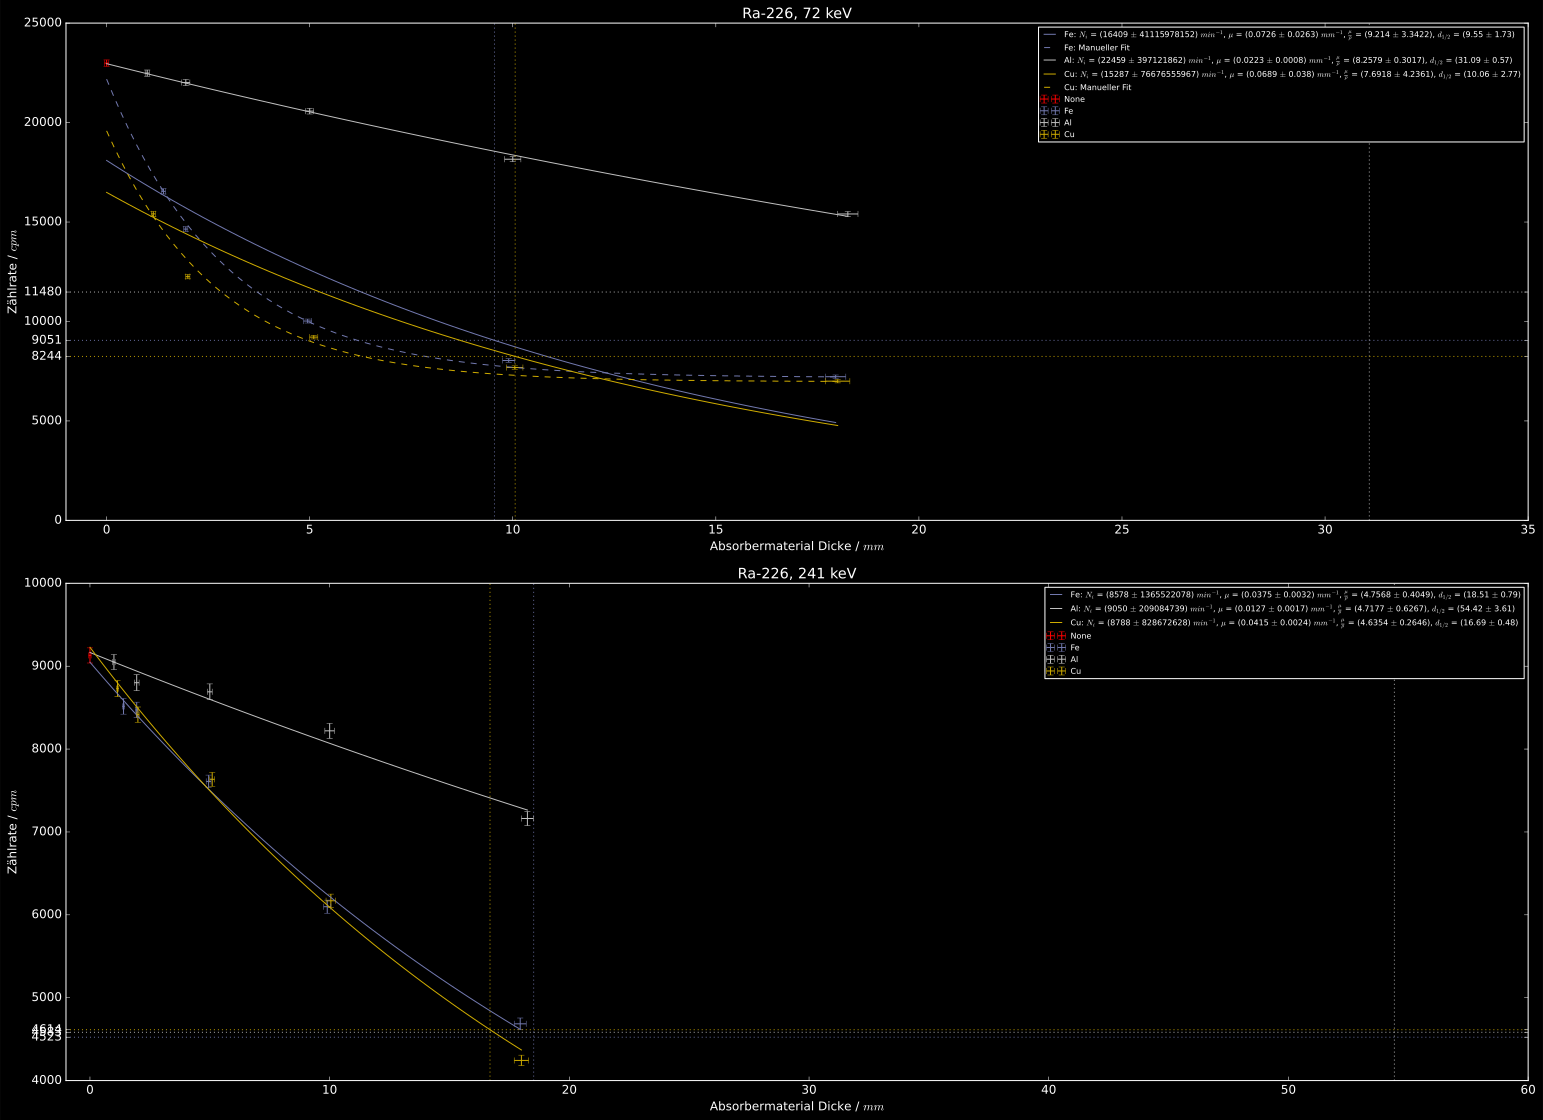

In [9]:
stuff2plot = "None", "Fe", "Al", "Cu"
plottyfunct(ra226_1, "Ra-226", *stuff2plot, dark=True, verbose=True)

351 keV Fe: N0 15806, N_incident 14723, u 0.0511954690989213, Delta d 1.386773123257406
351 keV Al: N0 15870, N_incident 15587, u 0.01766847198648478, Delta d 1.0192579715727637
351 keV Cu: N0 15554, N_incident 14634, u 0.05480367969458494, Delta d 1.112163323597292
609 keV Fe: N0 10467, N_incident 9840, u 0.04366348088601413, Delta d 1.4163857887943674
609 keV Al: N0 10499, N_incident 10327, u 0.016165031065019847, Delta d 1.0224398463141193
609 keV Cu: N0 10228, N_incident 9712, u 0.0444782883447012, Delta d 1.163777553063956


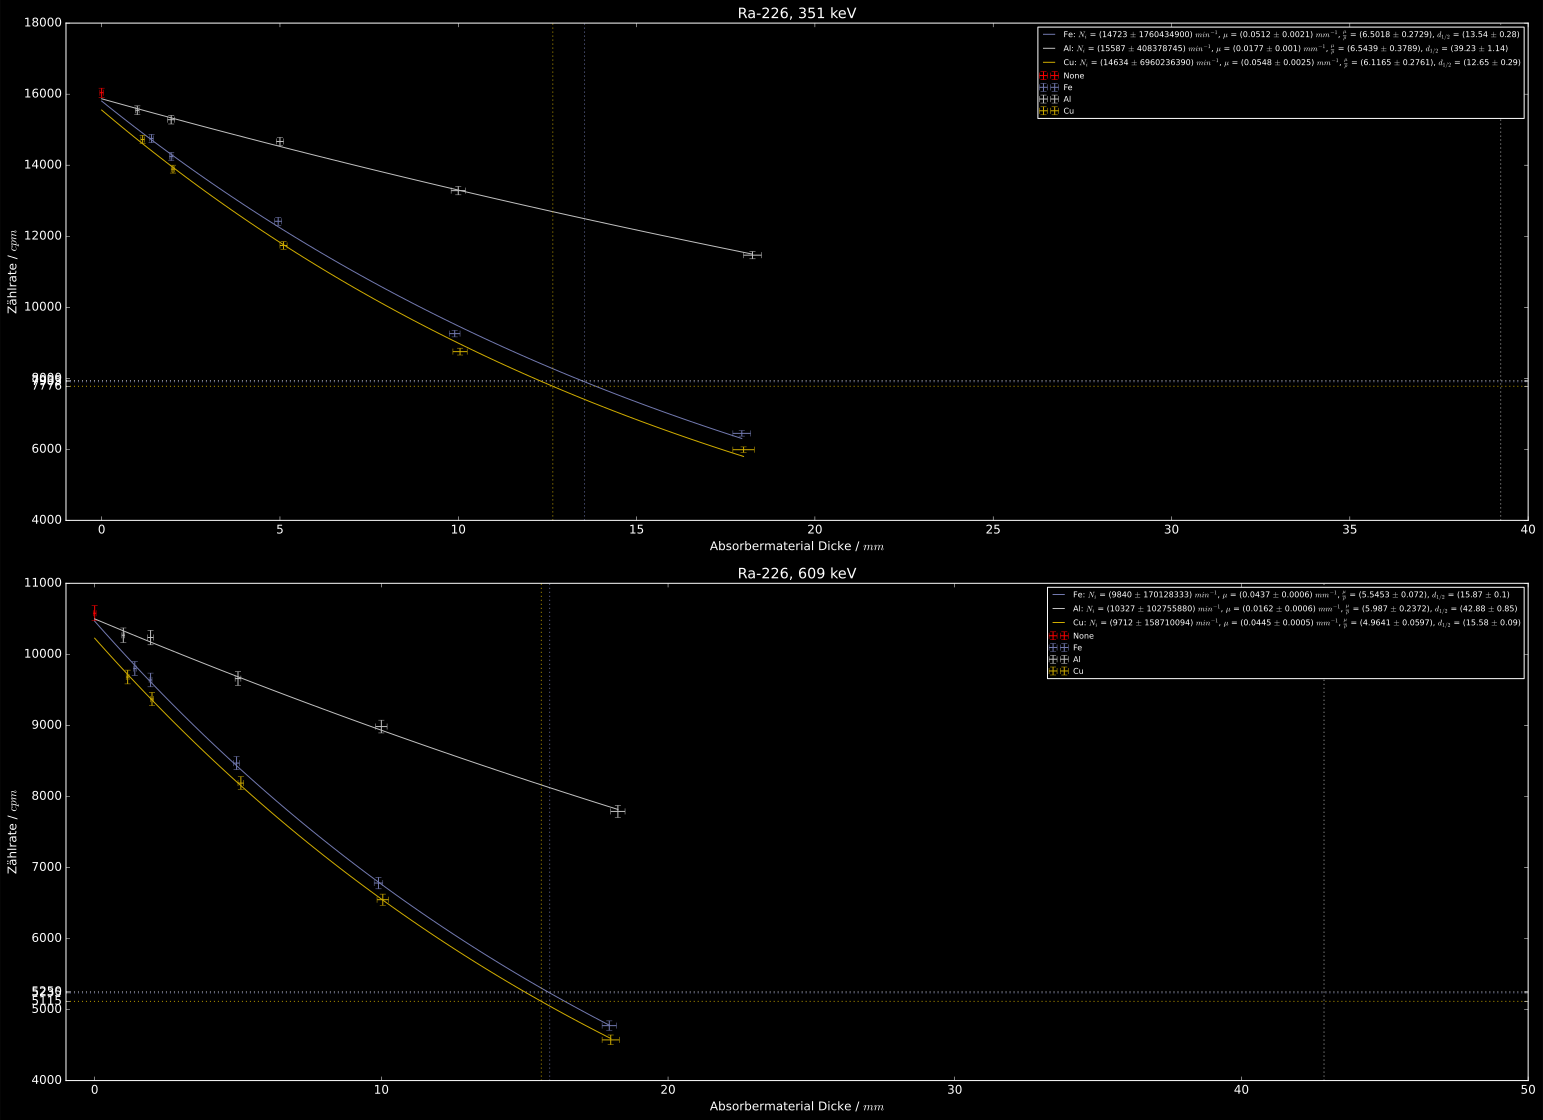

In [10]:
stuff2plot = "None", "Fe", "Al", "Cu"
plottyfunct(ra226_2, "Ra-226", *stuff2plot, dark=True, verbose=True)

72 keV Pb: N0 6093, N_incident 4290, u 0.031750038194853995, Delta d 11.049999999995745
241 keV Pb: N0 2735, N_incident 1732, u 0.04144812091490646, Delta d 11.024505908151344


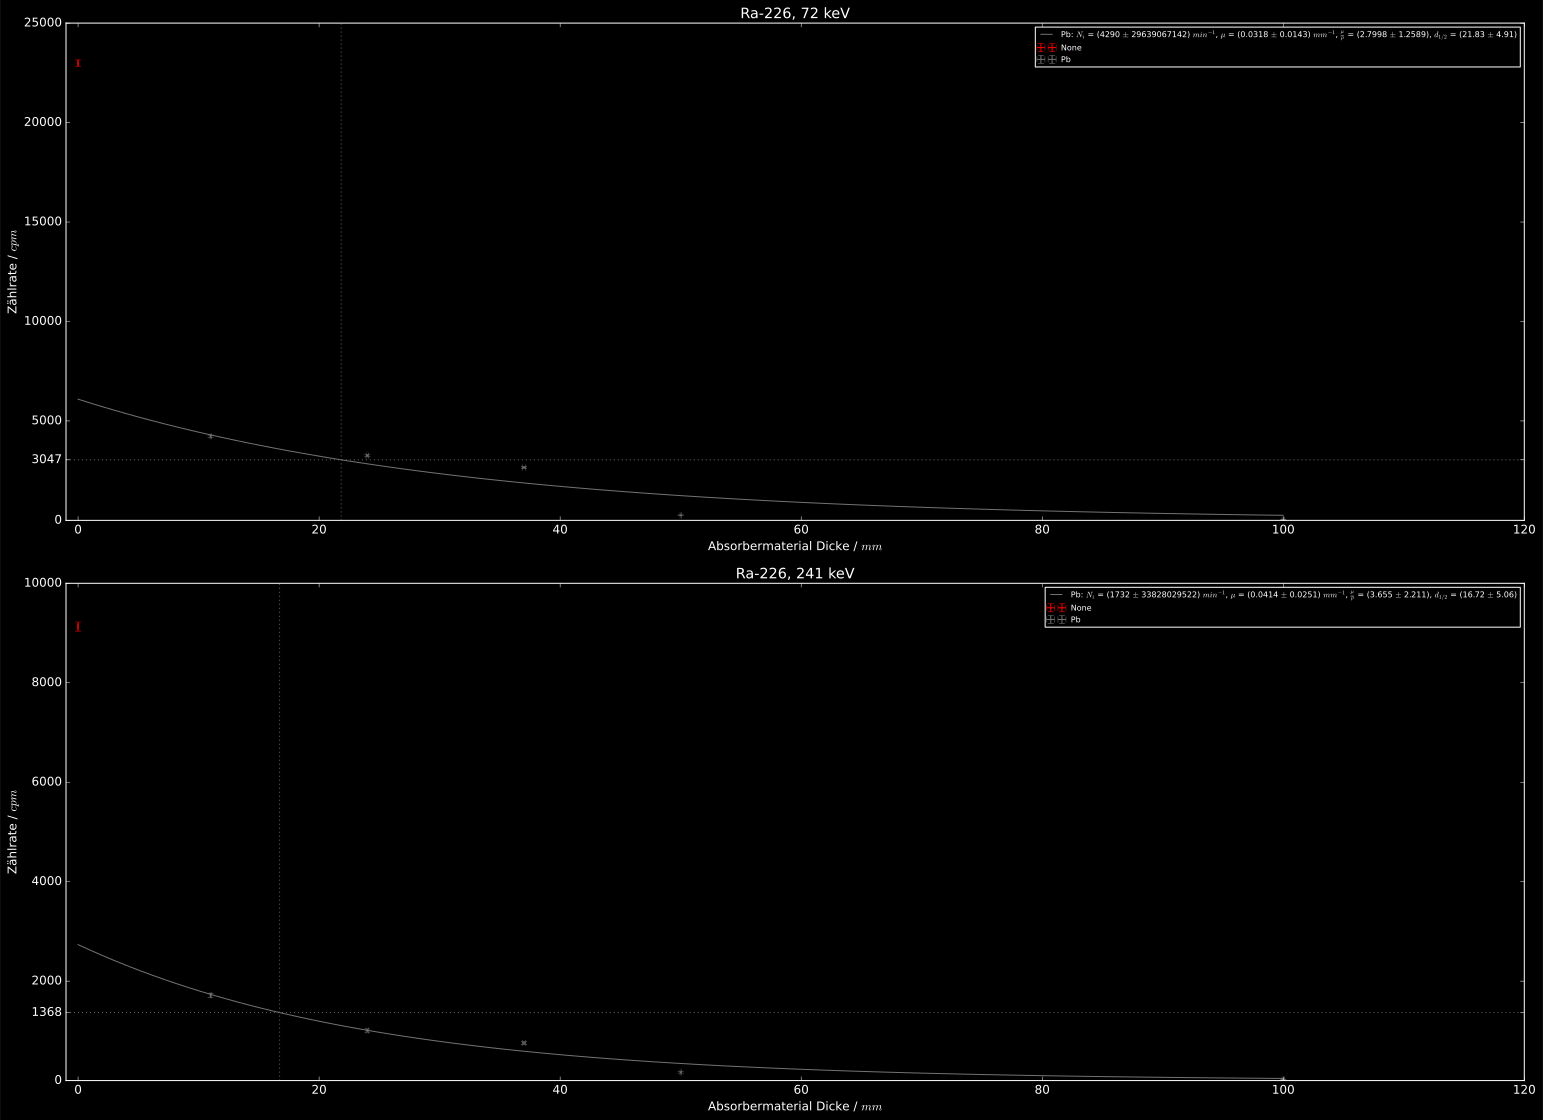

In [11]:
stuff2plot = "None", "Pb"
plottyfunct(ra226_1, "Ra-226", *stuff2plot, dark=True, verbose=True)

351 keV Pb: N0 4161, N_incident 2348, u 0.05212058529376781, Delta d 10.976059757109379
609 keV Pb: N0 7861, N_incident 3451, u 0.07488169622043821, Delta d 10.992031789906793


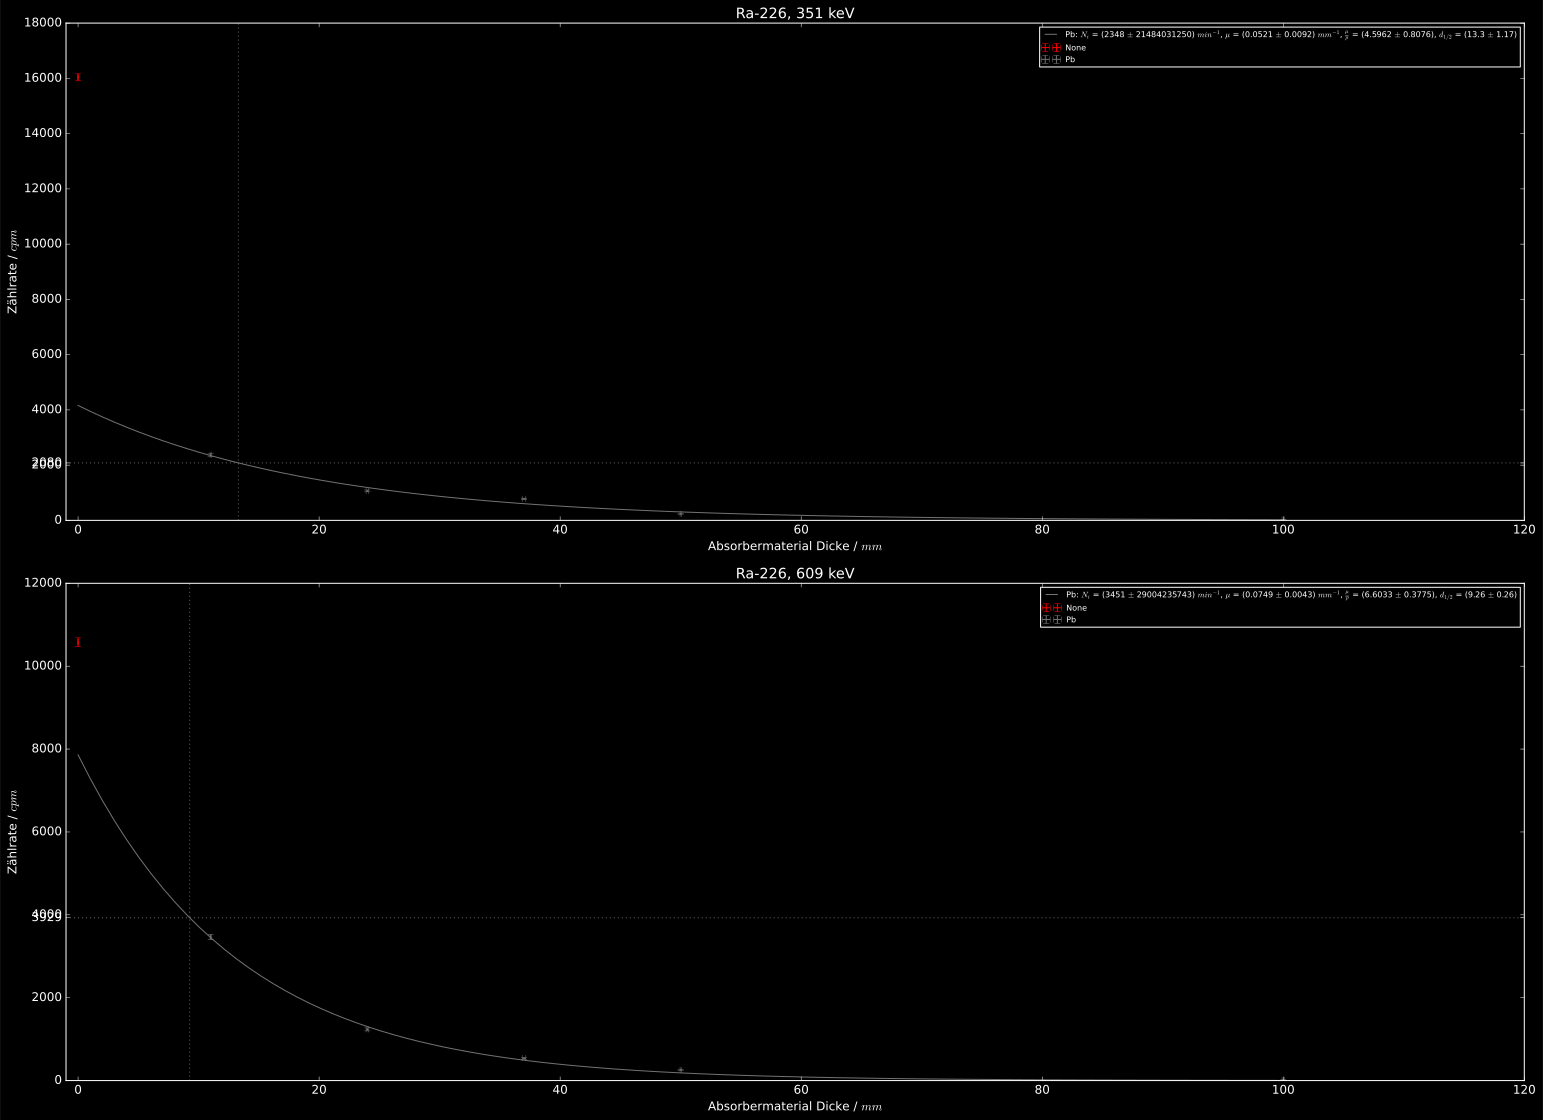

In [12]:
stuff2plot = "None", "Pb"
plottyfunct(ra226_2, "Ra-226", *stuff2plot, dark=True, verbose=True)

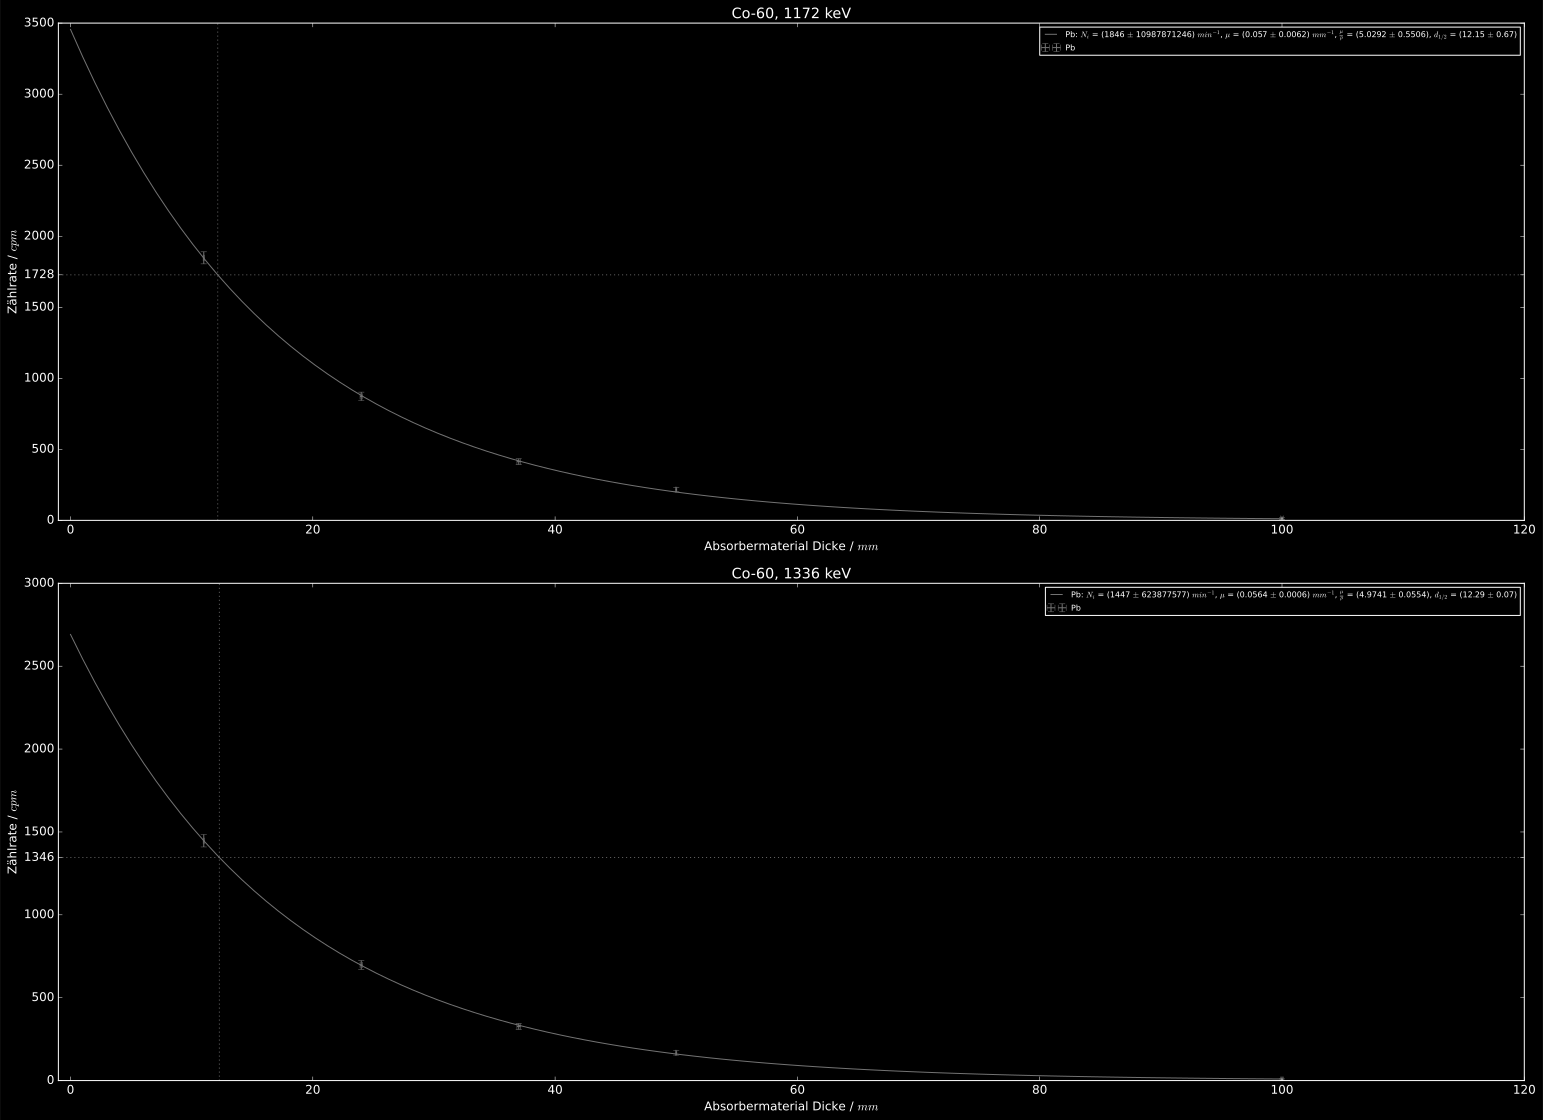

In [13]:
stuff2plot = ["Pb"]
plottyfunct(co60, "Co-60", *stuff2plot, dark=True, verbose=True)

Zu sehen sind die Datenpunkte aus den Messungen und als durch gezogene Linien die ermittelten Fits. Vertikale, gepunktete Linien kennzeichnen die jeweiligen Halbwertsschichtdicken (HSD) - horizontale und gestrichelt Linien die Zählraten bei der jeweiligen HSD.

Im Plot für eine Photonenenergie von 72 keV fällt für die beiden Absorbermaterialien Eisen und Kupfer auf, dass die programmatisch gefundenen Fits vergleichsweise schlecht durch die Daten passen. In der Tat scheint es, als konvergierten sie gegen einen signifikant von 0 verschiedenen Offset der Zählrate.

Tabelle 1
|Fe				|``curve_fit()``	|manuell	|Cu					|``curve_fit()``|manuell		|
|:-------		|:--------------	|:----------|:--------			|:-----------	|:---------		|
|$N_0 / 1$		|16409				|9360		|$N_0 / 1$			|15287			|8300			|
|$\mu / mm^{-1}$|0.0726				|0.337		|$\mu / mm^{-1}$	|0.0689			|0.364			|
|$\Delta d / mm$|1.35				|1.4		|$\Delta d / mm$	|1.1			|1.15			|
|$c / 1$		|0					|7180		|$c / 1$			|0				|6970			|

Die beiden gestrichelt eingezeichneten Plots wurden durch manuelles finden passender Parameter ermittelt. Sie verlaufen zwar nicht optimal, jedoch augenscheinlich besser durch die Messdaten. Vergleich der durch ``curve_fit()`` gefundenen Parameter mit den manuell ermittelten zeigt Tab. 1. Es wird hier vermutet, dass es bei der Messung zu einer Kontamination unbekannter Herkunft und/oder Quereinstrahlung kam, die den Untergrund signifikant erhöht.

In [14]:
al = [27.78,20.18,12.23,10.42,9.276,7.802,6.146,5.496,5.006]
fe = [120.5,59.52,14.6,10.99,9.4,7.704,5.995,5.35,4.883]
cu = [159.3,76.3,15.59,11.19,9.413,7.625,5.901,5.261,4.803]
pb = [502.1,241.9,99.85,40.31,23.23,12.48,7.102,5.876,5.222]
al = [round(a*0.0027,4) for a in al]
fe = [round(a*0.007874,4) for a in fe]
cu = [round(a*0.00896,4) for a in cu]
pb = [round(a*0.01134,4) for a in pb]
al, fe, cu, pb

([0.075, 0.0545, 0.033, 0.0281, 0.025, 0.0211, 0.0166, 0.0148, 0.0135],
 [0.9488, 0.4687, 0.115, 0.0865, 0.074, 0.0607, 0.0472, 0.0421, 0.0384],
 [1.4273, 0.6836, 0.1397, 0.1003, 0.0843, 0.0683, 0.0529, 0.0471, 0.043],
 [5.6938, 2.7431, 1.1323, 0.4571, 0.2634, 0.1415, 0.0805, 0.0666, 0.0592])

Das [*National Institute of Standards and Technology*](https://www.nist.gov/) (NIST) stellt eine detaillierte [Datenbank](https://physics.nist.gov/PhysRefData/XrayMassCoef/tab3.html) der energieabhängigen Massenabsorbtionskoeffizienten von elementaren, wie zusammen gesetzten Absorbermaterialien zur Verfügung.

Den Daten des NIST entnommen zeigt Tab. 2 die zu erwartenden Werte für die $\mu$, sowie für $\frac{\mu}{\rho}$. Daneben sind die gefunden Werte der Messung aufgezeichnet.

Tabelle 2
| Material $\rho / g \cdot mm^{-3}$  | Energie / keV | $\mu_{lit} / mm^{-1}$ | $\frac{\mu_{lit}}{\rho} / mm^{2}\cdot g^{-1}$ | $\mu / mm^{-1}$      | $\frac{\mu}{\rho} / mm^{2}\cdot g^{-1}$ 	|
|------------------------------------|---------------|-----------------------|-----------------------------------------------|----------------------|-------------------------------------------|
| Al 0,0027                          | 72            | 0,0750 - 0,0545       | 27,78 - 20,18                                 | 0,0223 $\pm$ 0,0008  | 8,2579 $\pm$ 0,3017                 		|
|                                    | 241           | 0,033 - 0,0281        | 12,23 - 10,42                                 | 0,0127 $\pm$ 0,0017  | 4,7177 $\pm$ 0,6267            			|
|                                    | 351           | 0,0281 - 0,025        | 10,42 - 9,276                                 | 0,0177 $\pm$ 0,0010  | 6,5439 $\pm$ 0,3789             			|
|                                    | 609           | 0,0211                | 7,802                                         | 0,0162 $\pm$ 0,0006  | 5,987 $\pm$ 0,2372       					|
|                                    | 1172          | 0,0166 - 0,0148       | 6,146 - 5,496                                 | -                    | -                                       	|
|                                    | 1336          | 0,0148 - 0,0135       | 5,496 - 5,006                                 | -                	| -                                        	|
| Fe 0,007874                        | 72            | 0,9488 - 0,4687       | 120,5 - 59,52                                 | 0,0726 $\pm$ 0,0263  | 9,214 $\pm$ 3,3422              			|
|                                    | 241           | 0,1150 - 0,0865       | 14,6 - 10,99                                  | 0,0375 $\pm$ 0,0032  | 4,7568 $\pm$ 0,4049                       |
|                                    | 351           | 0,0865 - 0,0740       | 10,99 - 9,4                                   | 0,051 $\pm$ 0,0021   | 6,5018 $\pm$ 0,2729                       |
|                                    | 609           | 0,0607                | 7,704                                         | 0,0431 $\pm$ 0,0006  | 5,5453 $\pm$ 0,072                        |
|                                    | 1172          | 0,0472 - 0,0421       | 5,995 - 5,35                                  | -                	| -                                        	|
|                                    | 1336          | 0,0421 - 0,0384       | 5,35 - 4,883                                  | -                	| -                                        	|
| Cu 0,00896                         | 72            | 2,3412 - 1,4273       | 159,3 - 76,3                                 | 0,0689 $\pm$ 0,0380 	| 7,6918 $\pm$ 4,2361         				|
|                                    | 241           | 0,1397 - 0,1003       | 15,59 - 11,19                                 | 0,0415 $\pm$ 0,0024  | 4,6354 $\pm$ 0,2646                       |
|                                    | 351           | 0,1003 - 0,0843       | 11,19 - 9,413                                 | 0,0548 $\pm$ 0,0025 	| 6,1165 $\pm$ 0,2761     					|
|                                    | 609           | 0,0683                | 7,625                                         | 0,0445 $\pm$ 0,0005 	| 4,9641 $\pm$ 0,0597                       |
|                                    | 1172          | 0,0529 - 0,0471       | 5,901 - 5,261                                 | -                	| -                                        	|
|                                    | 1336          | 0,0471 - 0,0430       | 5,261 - 4,803                                 | -                	| -                                        	|
| Pb 0,01134                         | 72            | 5,6938 - 2,7431       | 502,1 - 241,9                                 | 0,0318 $\pm$ 0,0143 	| 2,7998 $\pm$ 1,2589       				|
|                                    | 241           | 1,1323 - 4,571        | 99,85 - 40,31                                 | 0,0414 $\pm$ 0,0251 	| 3,655 $\pm$ 2,211        					|
|                                    | 351           | 0,4571 - 0,2634       | 40,31 - 23,23                                 | 0,0521 $\pm$ 0,0092 	| 4,5962 $\pm$ 0,8076        				|
|                                    | 609           | 0,1415                | 12,48                                         | 0,0749 $\pm$ 0,0043 	| 6,6033 $\pm$ 0,3775           			|
|                                    | 1172          | 0,0805 - 0,0666       | 7,102 - 5,876                                 | 0,057 $\pm$ 0,0062  	| 5,0292 $\pm$ 0,5506      					|
|                                    | 1336          | 0,0666 - 0,0592       | 5,876 - 5,222                                 | 0,0564 $\pm$ 0,0006 	| 4,9741 $\pm$ 0,0554            			|

Die Abweichungen der gefundenen Werte sind relativ hoch. Dennoch über- oder unterschreiten die Literaturwerte die gefundenen teilweise deutlich.

Es lassen sich jedoch Trends erkennen: die Abweichungen der ermittelten zu den Literaturwerten steigen mit der Kernladungszahl des Absorbermaterials und dem Reziproken der Photon-Energie. Ebenso verhalten sich die relativen Abweichungen der Messwerte. Die folgenden Diagramme sollen das verdeutlichen.

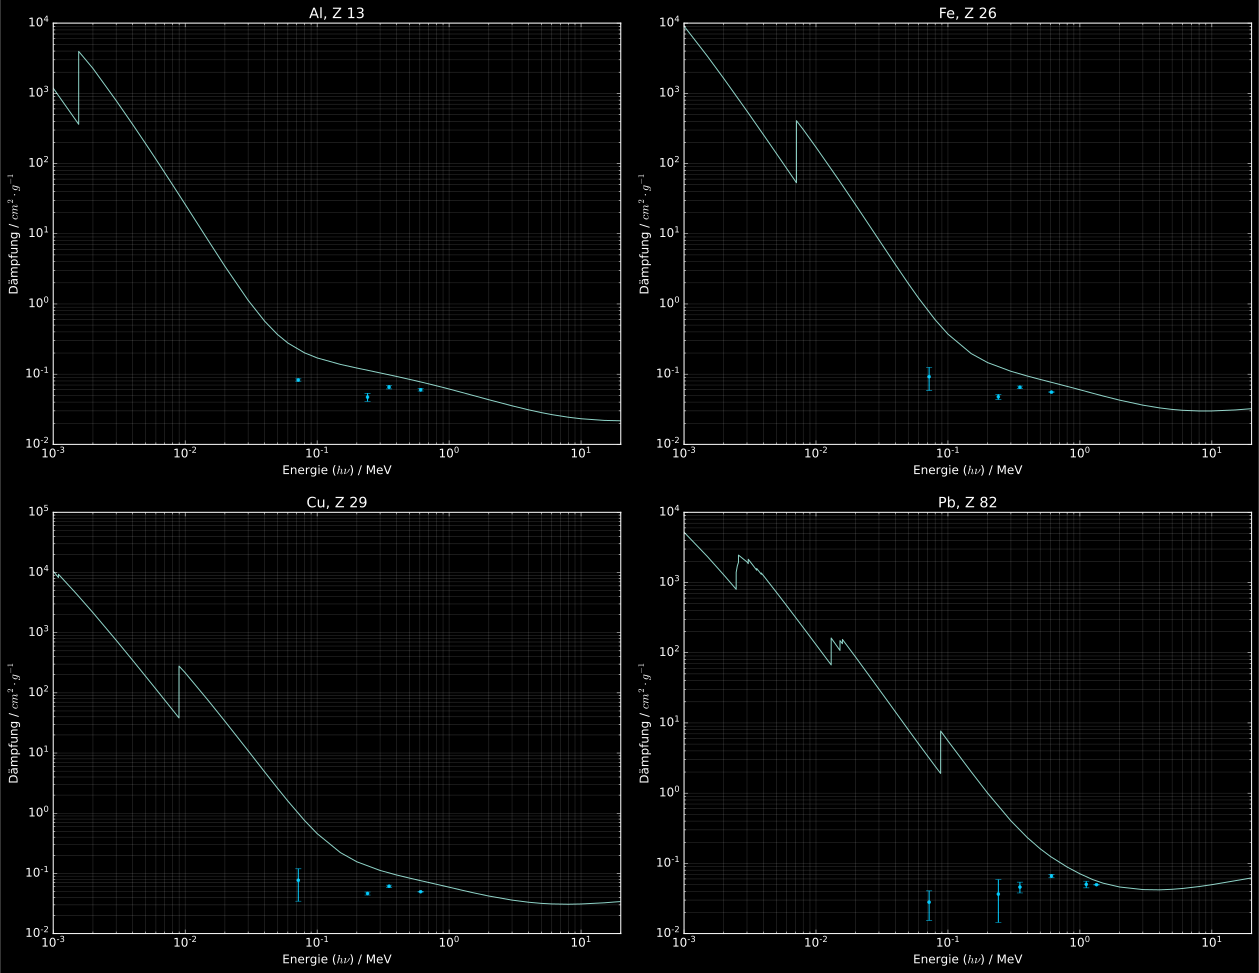

In [15]:
paths = ["./referenzen/aluminum.csv", "./referenzen/iron.csv", "./referenzen/copper.csv", "./referenzen/lead.csv"]
lits = []

for path in paths:
    with open(path, newline='', encoding='utf-8') as pa:
        lits.append(pd.read_csv(pa, delimiter=';'))

u_data = [
    [8.2579, 4.7177, 6.5439, 5.987, 0, 0], # al
    [9.214, 4.7568, 6.5018, 5.5453, 0, 0], # fe
    [7.6918, 4.6354, 6.1165, 4.9641, 0, 0], # cu
    [2.7998, 3.655, 4.5962, 6.6033, 5.0292, 4.9741]] # pb
uerr_data = [
    [0.3017, 0.6267, 0.3789, 0.2372, 0, 0],
    [3.3422, 0.4049, 0.2729, 0.072, 0, 0],
    [4.2361, 0.2646, 0.2761, 0.0597, 0, 0],
    [1.2589, 2.211, 0.8076, 0.3775, 0.5506, 0.0554]]
u_data = [[0.01 * u for u in u_data[i]] for i in range(len(u_data))] # mm**2 to cm**2
uerr_data = [[0.01 * u for u in uerr_data[i]] for i in range(len(uerr_data))]

cm = 1/2.54
ct = 0
plt.style.use("classic")
plt.style.use("dark_background")
# plt.style.use("seaborn-bright")
fig, axs = plt.subplots(2,2, figsize=(45*cm, 35*cm))
for i,col in enumerate(axs[0]):
    for j,row in enumerate(axs[1]):
        axs[i,j].plot(lits[ct]["1"], lits[ct]["2"]) # al, fe, cu, pb
        axs[i,j].errorbar([0.072,0.241,0.351,0.609, 1.1172, 1.336], u_data[ct][:], yerr=uerr_data[ct][:], linestyle='', marker='.', color='#00ccff')
        ct += 1
        axs[i,j].set_yscale("log")
        axs[i,j].set_xscale("log")
        axs[i,j].grid(which="both", linestyle="-", alpha=.2)
        axs[i,j].set_xlim(left=10**-3, right=20)
        axs[i,j].set_xlabel("Energie ($h\\nu$) / MeV")
        axs[i,j].set_ylabel("Dämpfung / $cm^2 \cdot g^{-1}$")
axs[0,0].set_title("Al, Z 13")
axs[0,1].set_title("Fe, Z 26")
axs[1,0].set_title("Cu, Z 29")
axs[1,1].set_title("Pb, Z 82")
plt.tight_layout()

In die Verläufe der tabellierten Daten des [NIST](https://physics.nist.gov/PhysRefData/XrayMassCoef/tab3.html) wurden die aus den Messungen ermittelten Massenabsorptionskoeffizienten $\frac{\mu}{\rho}$ eingezeichnet.

Ausgehend von den sehr ähnlichen Verläufen der ermittelten Werte wird vermutet, dass eine Kombination aus systematischem und methodischem Fehler vorliegt und die gefundenen Werte -- zumindest in den niederen Energiebereichen -- verworfen werden können.
Wie weiter oben ersichtlich spiegeln die Großzahl der Fits die Messdaten jedoch (vergleichsweise) gut wider was darauf hindeutet, dass die aus der Modellfunktion abgeleiteten Parameter valide, jedoch nicht reliabel sind.